In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r'taxi.csv')
data.head()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
0,15,1800000,5800,50,192000
1,15,1790000,6200,50,190400
2,15,1780000,6400,60,191200
3,25,1778000,6500,60,177600
4,25,1750000,6550,60,176800


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
Priceperweek              27 non-null int64
Population                27 non-null int64
Monthlyincome             27 non-null int64
Averageparkingpermonth    27 non-null int64
Numberofweeklyriders      27 non-null int64
dtypes: int64(5)
memory usage: 1.2 KB


In [4]:
data.describe()

,Priceperweek,Population,Monthlyincome,Averageparkingpermonth,Numberofweeklyriders
count,27.000000,2.700000e+01,27.000000,27.000000,27.000000
mean,49.925926,1.680111e+06,11063.259259,107.037037,160026.074074
std,27.627921,6.780307e+04,3416.627944,45.346089,21301.097303
min,15.000000,1.590000e+06,5800.000000,50.000000,115696.000000
25%,27.500000,1.617500e+06,8400.000000,75.000000,149600.000000
50%,40.000000,1.695000e+06,11600.000000,100.000000,161600.000000
75%,75.000000,1.725000e+06,13888.000000,140.000000,176000.000000
max,102.000000,1.800000e+06,16200.000000,200.000000,192000.000000


In [5]:
data.isnull().sum()

Priceperweek              0
Population                0
Monthlyincome             0
Averageparkingpermonth    0
Numberofweeklyriders      0
dtype: int64

In [6]:
data.shape

(27, 5)

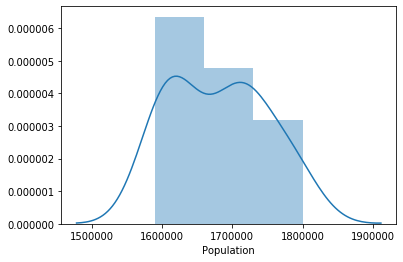

In [7]:
sns.distplot(data['Population'])
plt.show()

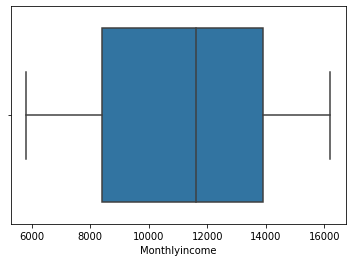

In [8]:
sns.boxplot(x= 'Monthlyincome', data=data)

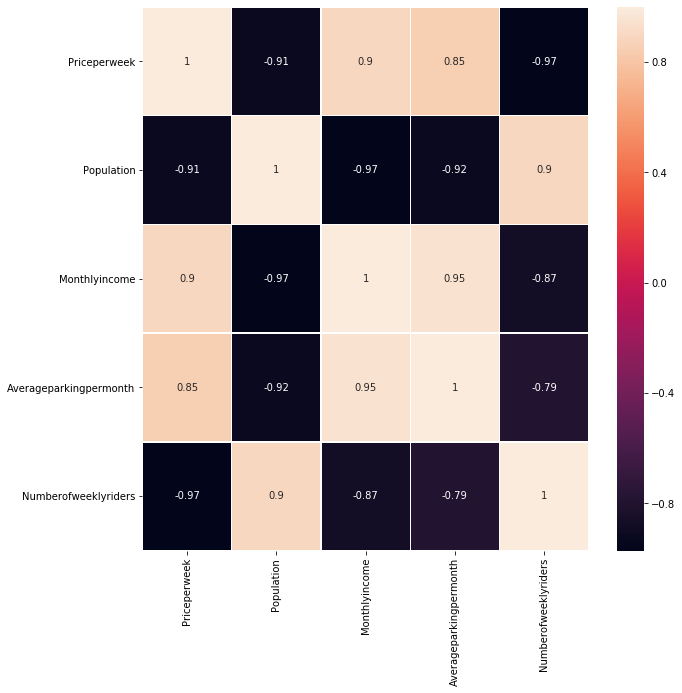

In [9]:
plt.figure(figsize =(10,10))
sns.heatmap(data.corr(), annot = True,linewidths=.5)
plt.show()

In [10]:
X = data.drop('Numberofweeklyriders', axis =1)
y = data['Numberofweeklyriders']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(21, 4)
(21,)
(6, 4)
(6,)


# LINEAR REGRESSION:

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
predictions = lr.predict(X_test)
predictions

array([187985.04703558, 135922.73005617, 167220.64801511, 125603.39638998,
       179401.78993174, 166095.67586185])

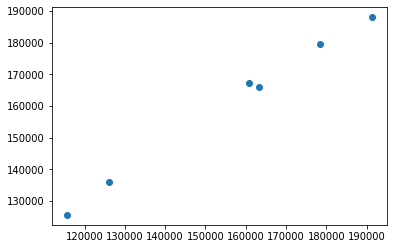

In [16]:
plt.scatter(y_test, predictions)

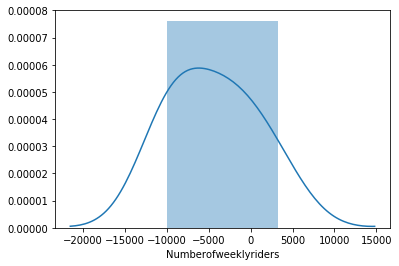

In [17]:
sns.distplot(y_test - predictions)

In [18]:
import pickle

In [19]:
with open('uber_model.pkl','wb') as file:
    pickle.dump(lr, file)